# Isolation Tree 

source: [potintelligence.com](https://spotintelligence.com/2024/05/21/isolation-forest/)

<Figure size 500x500 with 0 Axes>

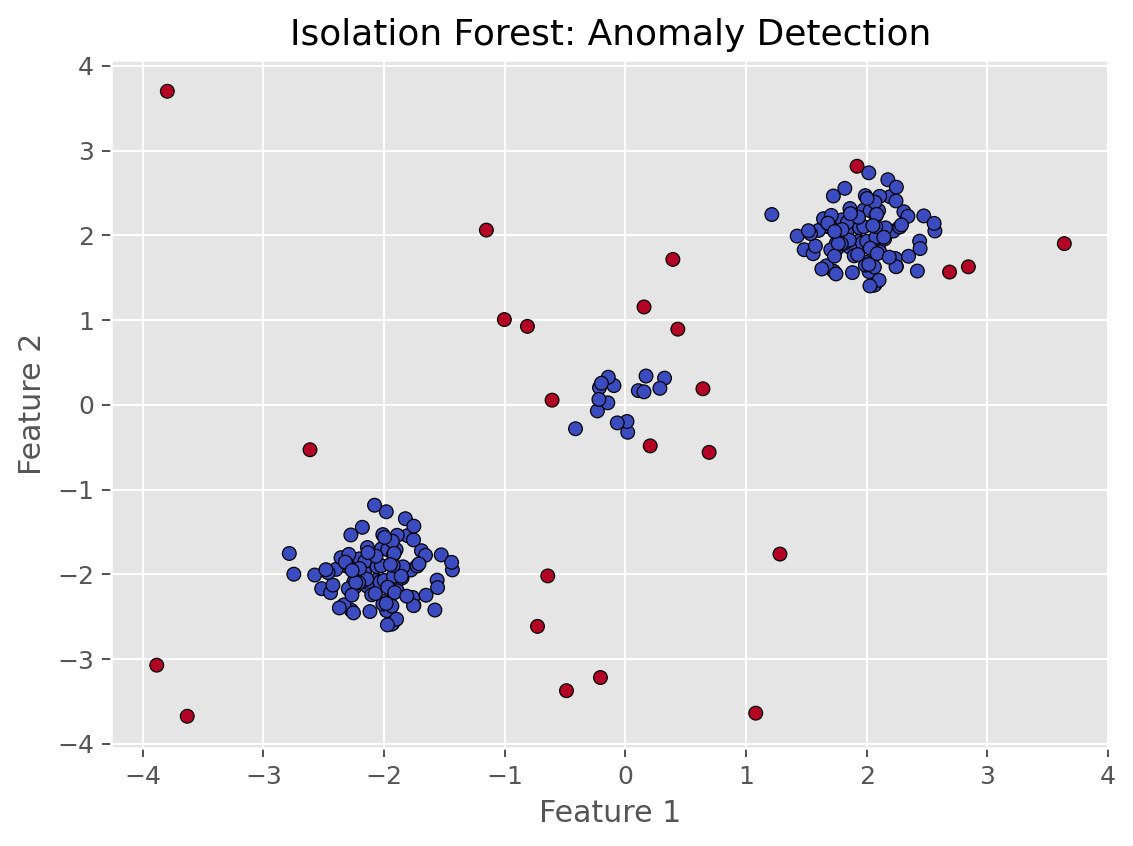

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       220
           1       0.75      0.90      0.82        20

    accuracy                           0.97       240
   macro avg       0.87      0.94      0.90       240
weighted avg       0.97      0.97      0.97       240



In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Create a synthetic dataset
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_test = 0.3 * rng.randn(20, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Combine the training and test datasets
X_combined = np.r_[X_train, X_test, X_outliers]

# Convert to DataFrame for easier handling
df = pd.DataFrame(X_combined, columns=['Feature1', 'Feature2'])

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model to the data
iso_forest.fit(df[['Feature1', 'Feature2']])

# Predict anomalies
df['anomaly'] = iso_forest.predict(df[['Feature1', 'Feature2']])

# Anomalies are labeled as -1, normal points as 1
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Plot the data points and anomalies
plt.style.use('ggplot')
plt.figure(figsize=(5, 5))
plt.figure(dpi=180)
plt.scatter(df['Feature1'], df['Feature2'], c=df['anomaly'], cmap='coolwarm', edgecolor='k', s=30)
plt.title('Isolation Forest: Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()

# Assuming you have ground truth labels
true_labels = np.array([0] * 220 + [1] * 20)  # Example: 220 normal and 20 anomalies

# Evaluate the model
print(classification_report(true_labels, df['anomaly']))

In [8]:
display(df.head())
display(df.tail())

df['anomaly'].value_counts()

,Feature1,Feature2,anomaly
0,2.149014,1.958521,0
1,2.194307,2.456909,0
2,1.929754,1.929759,0
3,2.473764,2.230230,0
4,1.859158,2.162768,0


,Feature1,Feature2,anomaly
235,-0.067073,-0.212226,0
236,-2.614385,-0.529187,1
237,-0.811962,0.926801,1
238,1.080749,-3.637568,1
239,-1.003099,1.006879,1


anomaly
0    216
1     24
Name: count, dtype: int64

There are several excellent resources to help you learn about using isolation forests in Python. Here are a few that stand out:

1. **Paperspace Blog**: This tutorial provides a comprehensive guide on anomaly detection using isolation forests, including practical examples and code snippets¹.

2. **Scikit-learn Documentation**: The official scikit-learn documentation offers a detailed example of using the IsolationForest class for anomaly detection, complete with code and visualizations².

3. **DataTechNotes**: This tutorial covers the basics of the Isolation Forest algorithm, preparing datasets, and implementing the model in Python⁴.

4. **Spot Intelligence**: This step-by-step guide walks you through the entire process of implementing isolation forests for anomaly detection, from installing libraries to visualizing results³.

These resources should provide a solid foundation for understanding and applying isolation forests in your projects. If you have any specific questions or need further assistance, feel free to ask!

Source: Conversation with Copilot, 7/13/2024  
(1) Anomaly Detection Using Isolation Forest in Python. https://blog.paperspace.com/anomaly-detection-isolation-forest/.  
(2) IsolationForest example — scikit-learn 1.5.1 documentation. https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html.  
(3) Anomaly Detection with Isolation Forest in Python - DataTechNotes. https://www.datatechnotes.com/2020/03/anomaly-detection-with-isolation-forest-in-python.html.  
(4) Isolation Forest Made Easy & How To Tutorial. https://spotintelligence.com/2024/05/21/isolation-forest/.  
(5) Isolation Forest Algorithm For Outlier Detection In Python. https://blog.enterprisedna.co/isolation-forest-algorithm-in-python/.  